# ***THE SPARKS FOUNDATION***

##  Data Sciecne & Business Analytics Internship (#GRIPMARCH21)

### Created By : Ruchika Gajeshwar

### Task 1 - Prediction Using Supervised Machine Learning:



- In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.





## Problem Statement: 
    
## **Que: What will be the predicted score if student studies for 9.25 hrs/day?**

### Solution:

## Step 1:  Importing Required Libraries -

In [45]:
# Python Libraries:
import pandas as pd
import numpy as np


# Libraries for Visualization:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Library required for splitting data in Train and Test:
from sklearn.model_selection import train_test_split


# Library required for the Linear Regression Algorithm:
from sklearn.linear_model import LinearRegression


# Library for metric required to evaluate the model:
from sklearn.metrics import mean_absolute_error

## Step 2 : Reading the Data into Pandas Dataframe -

In [46]:
# Load the dataset

stud_score = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [47]:
# Checking first 5 rows:

stud_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Inference: 

In [48]:
# Checking Last 5 rows:

stud_score.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [49]:
# Fetching 5 records at random from the dataset:

stud_score.sample(5)

,Hours,Scores
20,2.7,30
22,3.8,35
4,3.5,30
0,2.5,21
1,5.1,47


In [85]:
# Five Number Summary:

stud_score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Step 3: Understanding the Data - 

- ### **Datatype Of Columns**

In [50]:
stud_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


- We can conclude that the datatypes are correctly used as per the requirement of the data.

- ### **Shape Of Data**

In [51]:
stud_score.shape

(25, 2)

- The student score dataset has 25 rows and 2 columns.

* ### **Null Values**

In [52]:
stud_score.isnull().sum()

Hours     0
Scores    0
dtype: int64

- There are no null values in the dataset.

In [102]:
stud_score.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


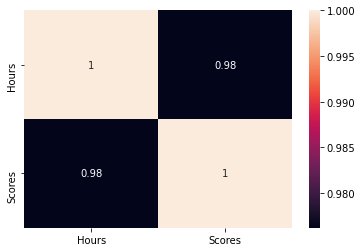

In [104]:
sns.heatmap(stud_score.corr(),annot = True);

- The high correlation between u and x indicates that the variable u is good predictor of variable x.

## Step 4: Exploring the Relationship in Dataset -

In [108]:
Plot = px.scatter( x = stud_score['Hours'], y = stud_score['Scores'], labels = {'x' : 'Hours', 'y' : 'Scores'})
Plot.show()

- Here we can clearly observe a ***strong relationship*** between both variables and can imagine a straight line, making them ideal for ***Linear Regression Application***.



## Step 5: Spliting the Dataset into Train and Test Split - 

- ### **Data Preparation**

In [56]:
X = stud_score.iloc[:, :-1].values
y = stud_score.iloc[:, 1].values

- ### **Divide the data into training and test sets and check the train_test_split function**

In [74]:
# Spliting the Data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [75]:
# print dimension of train set:
print('X_train', X_train.shape)
print('y_train', y_train.shape) 


# print dimension of test set:
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (20, 1)
y_train (20,)
X_test (5, 1)
y_test (5,)


## Step 6: Implementing the Linear Regression Algorithm - 

- ### **Fitting the Model**

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
# Training the Linear Regression Model:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

- ### **Plotting the Regression Line with Actual Vs Predicted Values**

In [78]:
# Plotting the predicted Line:
coefficient = model.coef_
intercept = model.intercept_

# Since, y = m*x + c
line = (stud_score['Hours'].values * coefficient) + intercept

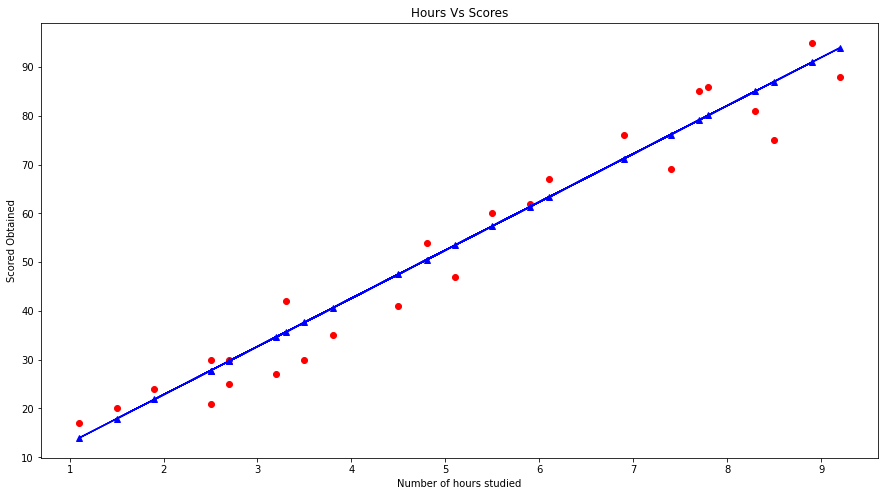

In [98]:
plt.figure(figsize = (15,8))
plt.scatter(stud_score.Hours, stud_score.Scores, color = 'red')
plt.plot(stud_score.Hours, line, color = 'blue', marker = '^')
plt.title('Hours Vs Scores')
plt.xlabel('Number of hours studied')
plt.ylabel('Scored Obtained')
plt.show()

- ### **Predicting the Values**

In [100]:
pred = model.predict(X_test)
pred

array([40.60416792, 50.48181243, 27.76323006, 87.0290971 , 47.51851908])

In [81]:
# Comparing Actual and Predicted Values:

pred_compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values':pred})
pred_compare

,Actual Values,Predicted Values
0,35,40.604168
1,54,50.481812
2,21,27.763230
3,75,87.029097
4,41,47.518519


## Step 6: Finding the Solution of question asked in Problem Statement -  

In [82]:
from sklearn import metrics

In [83]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, pred))
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, pred)**0.5)
print("R2 Score: ", metrics.r2_score(y_test, pred))

Mean Absolute Error:  6.8866403471761775
Mean Squared Error:  55.343178161924186
Root Mean Squared Error:  7.43929957468606
R2 Score:  0.8345792140066828


- What will be predicted score if a student study for 9.25 hrs in a day?

In [84]:
hours = np.asarray(9.25).reshape(-1,1)
print(f"{model.predict(hours)[0]} will be predicted score if a student study for 9.25 hrs in a day.")

94.43733048038092 will be predicted score if a student study for 9.25 hrs in a day.


## Step 7: Conclusion - 

###  After successful model building and the prediction on test data, we can conclude that Marks obtained by       student who studies for 9.25 hours/day will be equal to 94.44% 